# Customer Health/Risk Score Project

Author: Lavinia Wang <br>
@Showpad

This project aims to use Showpad customers' (legal) profile(historical data) to build statistical models that will help understand:
- What patterns indicate customer will churn
- How likely the customer is going to churn
- What score the customer should be labeled in terms of risk to churn

Methods:
- Logistic regression
- Randrom forest
- KNN
- LDA
- Naive bayes
- Neural network

In [127]:
## Import modules
import numpy as np
import pandas as pd
import datetime as dt
import math
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import neighbors, naive_bayes
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
## Load file into pandas
## Data starts in row #5
df = pd.read_csv("/Users/liyan.wang/Desktop/Customer_Health_Score/Metadata SFDC (customers active at Feb2018) - Main.csv", header=0)
df = df[4:].reset_index(drop=True)
#df

In [4]:
df.shape

(1087, 41)

In [5]:
df.describe(include="O")

,Customer Name,SFDC Account ID,Account Status,Okay for Speech API Rollout?,Current Location (primary),Current Location (secondary),Filename (primary),Filename (secondary),Initial Term Start Date,Initial Term Length,...,Account Contract End Date,Account Owner,Customer Success Coach,Expected Renewal ARR * Currency,Package,Assigned users,Segment,Billing State/Province,Billing Country,Hoovers Industry
count,1087,1087,1087,1087,1069,724,1065,720,1080,1080,...,1079,1087,1072,1087,1087,1087,1087,523,1086,330
unique,1087,1087,12,8,1027,678,1028,676,658,19,...,350,36,20,3,5,134,2,82,41,138
top,Recticel Insulation,001D000001XSlN0,Active Customer - Content,ok,Conga-SAI-00654,Box: RestrictedLegal/Contract/Customer Contrac...,Saint-Gobain SSA 30nov2015,Arval Service Lease SA SO 21dec2017,31Dec2017,12,...,31/12/2018,Bartel Van Herreweghe,Celine Vincent,EUR,Essential,100,MM,California,United States,Medical Equipment & Supplies Manufacturing
freq,1,1,711,821,23,20,23,20,42,992,...,85,238,321,642,623,385,834,65,301,28


In [6]:
## Look at descriptive statistics of numeric variables
df.describe()

,Expected Renewal ARR *,N° of Licenses,Used Licenses,Employees,Fortune Rank
count,1087.000000,1087.000000,1087.000000,725.000000,56.000000
mean,21767.509126,114.708372,95.949402,10218.663448,214.035714
std,44749.374503,400.164184,367.383186,33080.652847,307.364395
min,-679.350000,0.000000,0.000000,0.000000,0.000000
25%,3000.000000,10.000000,7.000000,100.000000,0.000000
50%,8400.000000,25.000000,19.000000,430.000000,0.000000
75%,21627.500000,65.000000,54.000000,3800.000000,416.000000
max,725400.000000,7500.000000,7228.000000,219678.000000,948.000000


In [7]:
## Ouput column names for future use
df.columns

Index(['Customer Name', 'SFDC Account ID', 'Account Status',
       'Okay for Speech API Rollout?', 'Current Location (primary)',
       'Current Location (secondary)', 'Filename (primary)',
       'Filename (secondary)', 'Initial Term Start Date',
       'Initial Term Length', 'Auto-renewal', 'Termination Rights',
       'Marketing', 'Non-Solicit Obligations', 'Legal Terms and Conditions',
       'SLA', 'DPA', 'Privacy Policy Change Notice Requirement',
       'Data or Security Breach Notice Requirement',
       'Change of Control provision', 'Governing Law',
       'Notable Non-Standard Terms', 'Outrageous Terms',
       'Expected Renewal ARR * (converted) Currency',
       'Expected Renewal ARR * (converted)', 'Account Status.1',
       'Account Contract End Date', 'Account Owner', 'Customer Success Coach',
       'Expected Renewal ARR * Currency', 'Expected Renewal ARR *', 'Package',
       'N° of Licenses', 'Used Licenses', 'Assigned users', 'Segment',
       'Employees', 'Fortune

## Variable Exploration 

Explore distribution of various levels in each categorical variable that should be used in the model

In [8]:
## Function that takes dataframe group by each categorical column/variable
## Output a table shows grouping numbers by different levels and a bar chart to visualize

def exploration(data, variable):
    lst = data.groupby(by=variable).count()
    lst = lst['SFDC Account ID']
    print(lst)
    lst.plot.bar()  

In [9]:
#c_Speech_API_Rollout = exploration(df,'Okay for Speech API Rollout?')
#c_Initial_Term_Length = exploration(df,'Initial Term Length')
#c_Auto_renewal = exploration(df, 'Auto-renewal')
#c_Termination_Rights = exploration(df,'Termination Rights')
#c_Marketing = exploration(df,'Marketing')
#c_Non_Solicit_Obligations = exploration(df,'Non-Solicit Obligations')
#c_Legal_Terms_Conditions = exploration(df, 'Legal Terms and Conditions')
#c_SLA = exploration(df,'SLA')
#c_DPA = exploration(df,'DPA')
#c_Privacy_Change_Notice = exploration(df,'Privacy Policy Change Notice Requirement')
#c_Data_Security_Breach_Notice = exploration(df,'Data or Security Breach Notice Requirement')
#c_Control_provision = exploration(df,'Change of Control provision')
#c_Governing_Law = exploration(df,'Governing Law')
#c_Outrageous_Terms = exploration(df,'Outrageous Terms')
#c_account = exploration(df,'Account Status')
#c_Account_Owner = exploration(df,'Account Owner')
#c_Customer_Success_Coach = exploration(df,'Customer Success Coach')
#c_Package = exploration(df,'Package')
#c_Segment = exploration(df,'Segment')

<b>After disucssion with legal team @6/27/2019 3:30:-4:30 pm CST, 'Account status' is selected as dependent/outcome variable. Therefore this is a typical prediction problem for calculating probability of an instance (churn) and feature selected can be used for interpretation. </b>
    
1. Transformation need to be done:
    - Remove varibales irrevelant to model building, which are: 'SFDC Account ID','Current Location (primary)', 'Current Location (secondary)', 'Filename (primary)', 'Filename (secondary)',  'Account Contract End Date', 'Account Owner', 'Customer Success Coach', 'Fortune Rank', 'Billing State/Province', 'Billing Country', 'Hoovers Industry'
    - Remove rows with missing or irrelevant values(consent with legal team)
    - Transform 'Initial term start date' into 'Duration', which is calculated from initial term start date and use today's date as the end date.
    - Group/bin variables into a more standard format, e.g 'Auto-renewal' 
    - Convert 'Notable Non-standard Terms' and 'Outrageous Terms' into a binary answer question, i.e. any filled-in contents is considered 'Yes' and no is 'No'
    - Convert currency into a uniformed format, i.e. use 'Expected Renewal ARR *' of its own currency to generate renewal ARR in EUR 
    - Follow up with @Joy on how to group variables 'Okay for Speech API Rollout' and 'Governing Law'

2. Create dummy variables for all revelant categorical variables
3. Normalize data for modeling

## Transformation

- <b> Remove irrelevant variables from dataframe
- <b> Remove irrelevant account status from dataframe
- <b> Remove rows with null in 'Initial Term Start Date'</b>

In [10]:
def data_cleaning(data):
    df_copy = data.drop(labels=['SFDC Account ID','Current Location (primary)', 'Current Location (secondary)', 'Filename (primary)', \
    'Filename (secondary)', 'Expected Renewal ARR * (converted) Currency','Expected Renewal ARR * (converted)', 'Account Status.1', \
    'Account Contract End Date', 'Account Owner','Customer Success Coach', 'Fortune Rank', 'Billing State/Province', 'Billing Country', \
    'Hoovers Industry'], axis=1)
    
    # Remove irrelevant account status from dataframe
    remove_list = ['Active Customer - Reverse Ghost', 'Ghost Active - Content', 'Ghost Churned', 'Lead Partner', 'Prospect', 'Sandbox']
    for i in range(len(remove_list)):
        df_copy = df_copy[df_copy['Account Status'] != remove_list[i]]

    #null_row = df_copy[df_copy['Initial Term Start Date'].isnull()]

    df_copy = df_copy[df_copy['Customer Name'] != 'Technology Association of Oregon'].reset_index(drop=True)
    
    return df_copy

In [11]:
df_copy = data_cleaning(df)

In [12]:
df_copy.shape

(1036, 26)

- <b>Change 'Initial term start date' into 'Duration' then bin the variable</b>

In [13]:
def create_duration(data, variable):
    # Change 'Initial term start date' into 'Duration' then bin the variable
    df_copy['start_date'] = pd.to_datetime(data[variable])

    # Use strftime (string format time) to get string mm/dd/yyyy instead of the datetime object
    end_date = dt.datetime.today().strftime("%m/%d/%Y")
    end_date = pd.to_datetime(end_date)
    end_date = [end_date for i in range (len(df_copy))]
    df_copy['end_date'] = end_date

    # Create new variable called Duration representing 
    # how long the customer has been with Showpad
    diff = (df_copy['end_date'] - df_copy['start_date']).dt.days
    diff = diff.apply(lambda x : int(x))

    return diff

In [14]:
df_copy['duration'] = create_duration(df_copy, 'Initial Term Start Date')

- <b>Group/bin variables</b>

1. 'Okay for Speech API Rollout?'

In [15]:
def transform_okay_for_speech_api_rollout(data, variable):
    # 1: OK, 2: Hold for Special Notice, 3: Hold for Consent
    ok_list = ['OK-2', 'OK-3', 'OK-4', 'OK-DPA', 'ok', 'ok-5']
    tmp = np.array(data[variable])

    for i in range (tmp.size):
        if tmp[i] in ok_list:
            tmp[i] = '1'
        elif tmp[i] == 'Hold for Special Notice':
            tmp[i] = '2'
        elif tmp[i] == 'Hold for Consent':
            tmp[i] = '3'
        else:
            raise ValueError('Value not accepted.')
    
    speech_api_rollout = pd.DataFrame(tmp)

    return speech_api_rollout

In [16]:
df_copy['speech_api_rollout'] = transform_okay_for_speech_api_rollout(df_copy, 'Okay for Speech API Rollout?')

2. 'Initial Term Length'

In [17]:
def transform_initial_term_length(data, variable):
    # Create 4 equal width bins: (0,12], (12,24], (24,36],(36,48]
    tmp = data[variable].apply(lambda x: int(x))
    bins = [0, 12, 24, 36, 48]
    tmp_bin = pd.cut(tmp, bins).astype(str)

    for i in range (tmp.size):
        try:
            if tmp_bin[i] == '(0,12]':
                tmp_bin[i] = '1'
            elif tmp_bin[i] == '(12,24]':
                tmp_bin[i] = '2'
            elif tmp_bin[i] == '(24,36]':
                tmp_bin[i] = '3'
            else: #tmp[i] == '(36,48]'
                tmp_bin[i] = '4'
        except:
            raise ValueError('Value not accepted.')
    
    return tmp_bin

In [18]:
df_copy['term_length'] = transform_initial_term_length(df_copy, 'Initial Term Length')

3. Auto-renewal

In [19]:
def transform_auto_renewal(data, variable):
    # 1: 'No', 2: 'Yes - 30-day notice', 3:' Yes - less than 30-day notice', 4: 'Yes - greater than 30-day notice'
    yes_30_list = ['Yes', 'Yes ', 'Yes (30-day opt out)', 'Yes (30-day opt-out)', 'yes (30-day opt-out)','Yes (written notice)', \
    'Yes (Custom- written confirmation; 30-day opt-out)', 'Yes (custom opt-out)', 'Yes (custom-30-day opt-out)', 'Yes (written agreement)']
    yes_30_more_list = ['Yes (3-month opt-out)', 'Yes (90-day opt-out)', 'Yes (90-day notification & 30-day opt-out)']
    yes_30_less_list = ['Yes (1-day opt-out)', 'Yes (5-day opt-out)']
    no_list = ['No', 'No (written agreement)', 'No (written notice required)']

    tmp = np.array(data[variable]) 

    for i in range (tmp.size):
        try:
            if tmp[i] in no_list: 
                tmp[i] = '1'
            elif tmp[i] in yes_30_list:
                tmp[i] = '2'
            elif tmp[i] in yes_30_less_list:
                tmp[i] = '3'
            elif tmp[i] in yes_30_more_list:
                tmp[i] = '4'
        except:
            raise ValueError('Value not accepted.')
    
    auto_renewal = pd.DataFrame(tmp)

    return auto_renewal

In [20]:
df_copy['auto_renewal'] = transform_auto_renewal(df_copy, 'Auto-renewal')

4. 'Termination Rights'

In [21]:
def transform_termination_rights(data, variable):
    # 1:'No', 2: 'Yes - less than 90-day notice', 3: 'Yes - at least 90-day notice'
    yes_90_less_list = ['Yes', 'Yes (30 days)', 'Yes (5 days)', 'Yes (60-day notice)', 'Yes (Custom)', 'Yes (first 3 months)',\
        'Yes (written notice)', 'Yes - 30-day notice', 'Yes- Two Months Notice', 'Yes-Custom']
    yes_90_or_more_list = ['Yes (90-day notice)', 'Yes - 90-day notice']

    tmp = np.array(data[variable])

    for i in range (tmp.size):
        if tmp[i] == 'No':
            tmp[i] = '1'
        elif tmp[i] in yes_90_less_list:
            tmp[i] = '2'
        elif tmp[i] in yes_90_or_more_list:
            tmp[i] = '3'
        else: 
            raise ValueError('Value not accepted.')   
    
    termination_rights = pd.DataFrame(tmp)

    return termination_rights

In [22]:
df_copy['termination_rights'] = transform_termination_rights(df_copy, 'Termination Rights')

5. 'Marketing' 

In [23]:
def transform_marketing(data, variable):
    # 1: 'Affirmative prohibition', 2: 'Silent', 3: 'Basic permission to reference as a customer', 4:'Enhanced marketing commitment'
    prohibition_list = ['Affirmative Prohibition', 'Affirmative prohibition', "Referral Partner requires Showpad's approval", 'No']
    silent_list = ['Silent', 'Silent  ', 'Silent or Soft Commitment', 'Silent or Soft Commitment ', 'Silent or Soft Support']
    reference_list = ['Agreed to provide marketing support']
    enhanced_list = ['Enhanced marketing commitment']

    tmp = np.array(data[variable])

    for i in range (tmp.size):
        try:
            if tmp[i] in prohibition_list:
                tmp[i] = '1'
            elif tmp[i] in silent_list:
                tmp[i] = '2'
            elif tmp[i] in reference_list:
                tmp[i] = '3'    
            elif tmp[i] in enhanced_list: 
                tmp[i] = '4'
        except:
            raise ValueError('Value not accepted.')  
        
    marketing = pd.DataFrame(tmp)

    return marketing

In [24]:
df_copy['marketing'] = transform_marketing(df_copy, 'Marketing')

6. 'Non-Solicit Obligations'

In [25]:
def transform_non_solicit_obligations(data, variable):
    # 1: Yes, 0: No
    yes_list = ['Yes', 'Yes - 1 year']

    tmp = np.array(df_copy['Non-Solicit Obligations'])

    for i in range (tmp.size):
        if tmp[i] in yes_list:
            tmp[i] = '1'
        elif tmp[i] == 'No':
            tmp[i] = '0'
        else:
            raise ValueError('Value not accepted.')
        
    obligations = pd.DataFrame(tmp)

    return obligations

In [26]:
df_copy['obligations'] = transform_non_solicit_obligations(df_copy, 'Non-Solicit Obligations')

7. 'Legal Terms and Conditions'

In [27]:
def transform_legal_terms_n_conditions(data, variable):
    # 1: 'Custom', 2: 'Standard (MSA 2018v2)', 3: 'Standard (MSA 1Apr18)', 4: 'Standard (3Apr17)', 5: 'Standard (15Nov16)', 6: 'Standard (pre-15Nov16)'
    tmp = np.array(data[variable])

    custom_list = ['Custom (amended Standard (15nov2016 - 31mar2017))', 'Custom']

    for i in range (tmp.size):
        if tmp[i] in custom_list :
            tmp[i] = '1'
        elif tmp[i] == 'Standard (MSA 2018v2)':
            tmp[i] = '2'
        elif tmp[i] == 'Standard (MSA 01apr2018)': 
            tmp[i] = '3'
        elif tmp[i] == 'Standard (03apr2017-31mar2018)':
            tmp[i] = '4'
        elif tmp[i] == 'Standard (15nov2016 - 31mar2017)':
            tmp[i] = '5'
        elif tmp[i] == 'Standard (pre-15nov2016)':
            tmp[i] = '6'
        else:
            raise ValueError('Value not accepted.')
        
    legal_terms = pd.DataFrame(tmp)

    return legal_terms

In [28]:
df_copy['legal_terms'] = transform_legal_terms_n_conditions(df_copy, 'Legal Terms and Conditions')

8. 'SLA' 

In [29]:
def transform_sla(data, variable):
     # 1: 'No', 2: 'Custom', 3: 'Standard (Nov2016)', 4: 'Standard (2015)'
    custom_list = ['Yes', 'Yes ', 'Yes (Custom)', 'Yes (custom)', 'Yes (unknown)', 'Yes (updated time to time)']
    std_2016_list = ['Yes (Standard SLA Nov2016)']
    std_2015_list = ['Yes (Standard SLA 2015)', 'Yes (standard SLA 2015)']

    tmp = np.array(data[variable])

    for i in range (tmp.size):
        if tmp[i] == 'No':
            tmp[i] = '1'
        elif tmp[i] in custom_list:
            tmp[i] = '2'
        elif tmp[i] in std_2016_list:
            tmp[i] = '3'
        elif tmp[i] in std_2015_list: 
            tmp[i] = '4'
        else:
            raise ValueError('Value not accepted.')
    
    sla = pd.DataFrame(tmp)

    return sla

In [30]:
df_copy['sla'] = transform_sla(df_copy, 'SLA')

9. 'DPA'

In [31]:
def transform_dpa(data, variable):
    # 1: Yes, 0: No
    tmp = np.array(data[variable])

    for i in range (tmp.size):
        if tmp[i] == 'Yes':
            tmp[i] = '1'
        elif tmp[i] == 'No':
            tmp[i] = '0'
        else:
            raise ValueError('Value not accepted.')
        
    dpa = pd.DataFrame(tmp)

    return dpa

In [32]:
df_copy['dpa'] = transform_dpa(df_copy, 'DPA')

10. 'Privacy Policy Change Notice Requirement'

In [33]:
def transform_privacy_change_notice(data, variable):
    # Convert blank to 'No' 
    # 1: 'No', 2: 'Notice and Opportunity to Object', 3: 'Passive Notice'
    tmp = np.array(data[variable].fillna(1))

    for i in range (len(tmp)):
        try:
            if tmp[i] == 'No':
                tmp[i] = '1'
            elif tmp[i] == 'Affirmative Opt-in or Amendment' or tmp[i] == 'Provide Opportunity to Review and Object':
                tmp[i] = '2'
            elif tmp[i] == 'Publication of Privacy Policy': 
                tmp[i] = '3'
        except:
            raise ValueError('Value not accepted.')
        
    prvcy_change_note = pd.DataFrame(tmp)

    return prvcy_change_note

In [34]:
df_copy['prvcy_change_note'] = transform_privacy_change_notice(df_copy, 'Privacy Policy Change Notice Requirement')

11. 'Data or Security Breach Notice Requirement'

In [35]:
def transform_data_security_breach_notice(data, variable):
    # 1: 'No', 2: 'Yes - within 24 hours of discovery', 3: 'Yes - between 24-48 hours after discovery', 4: 'Yes - greater than 48 hours after discovery'
    w_24_list = ['24 Hours', 'Yes (12 hours)', 'Yes (24 hours)', 'Yes (ASAP)', 'Yes (Immediately)', 'Yes (immediate)',\
        'Yes (immediately)', 'Yes (within 24 hours of discovery)', 'Yes- immediate notice of CI loss']
    w_48_list = ['Yes', 'Yes  ', 'Yes (2 business days)', 'Yes (48 hours)', 'Yes (Custom)', 'Yes (Within 48 hours of discovery)', \
        'Yes (custom)', 'Yes (undefined)', 'Yes (immediate, within 48 hours)']
    m_48_list = ['Yes (72 hours)', 'Yes (Without Undue Delay)', 'Yes (within 72 hours of discovery)']

    tmp = np.array(data[variable])

    for i in range (tmp.size):
        try:
            if tmp[i] == 'No':
                tmp[i] = '1'
            elif tmp[i] in w_24_list:
                tmp[i] = '2'
            elif tmp[i] in w_48_list:
                tmp[i] = '3'
            elif tmp[i] in m_48_list:
                tmp[i] = '4'
        except: 
            raise ValueError('Value not accepted.')
          
    sec_breach_note = pd.DataFrame(tmp)

    return sec_breach_note

In [36]:
df_copy['sec_breach_note'] = transform_data_security_breach_notice(df_copy, 'Data or Security Breach Notice Requirement')

12. 'Change of Control provision'

In [37]:
def transform_change_of_control_provision(data, variable):
    # 1: Yes, 0: No
    tmp = np.array(data[variable])

    for i in range (tmp.size):
        if tmp[i] == 'Yes':
            tmp[i] = '1'
        elif tmp[i] == 'No':
            tmp[i] = '0'
        else: 
            raise ValueError('Value not accepted.')
        
    cntrl_prvsn = pd.DataFrame(tmp)

    return cntrl_prvsn

In [38]:
df_copy['cntrl_prvsn'] = transform_change_of_control_provision(df_copy, 'Change of Control provision')

13. 'Governing Law'

In [39]:
def transform_governing_law(data, variable):
    # 1: New York,  2: Delaware, 3: California, 4: Illinois, 5: Texas, 6: Belgium, 7: Ireland, 8: France, 9: Germany, 
    # 10: rest of the states in the USA, 11: rest of the countries in the EU
    # Since there are only 2 records of Germany, I will change it into group 11 unless we have more data 
    tmp = np.array(data[variable])

    CA_list = ['California', 'California ']
    USA_rest_list = ['Florida', 'Georgia',  'Indiana', 'Nevada', 'New Jersey',  'Pennsylvania', 'Wisconsin', 'None']
    Germany_list = ['Germany', 'German']
    EU_rest_list = ['England', 'England & Wales', 'England and Wales', 'England/Wales', 'English', 'UK', 'Dutch', 'Switzerland' ]
 
    for i in range (tmp.size):
        if tmp[i] == 'New York':
            tmp[i] = '1'
        elif tmp[i] == 'Delaware':
            tmp[i] = '2'
        elif tmp[i] in CA_list:
            tmp[i] = '3'
        elif tmp[i] == 'Illinois':
            tmp[i] = '4'
        elif tmp[i] == 'Texas':
            tmp[i] = '5'
        elif tmp[i] == 'Belgium':
            tmp[i] = '6'
        elif tmp[i] == 'Ireland':
            tmp[i] = '7'
        elif tmp[i] == 'France':
            tmp[i] = '8'
        elif tmp[i] in Germany_list:
            tmp[i] = '9'
        elif tmp[i] in USA_rest_list:
            tmp[i] = '10'  
        elif tmp[i] in EU_rest_list or tmp[i] in Germany_list:
            tmp[i] = '11'
        else:
            raise ValueError('Value not accepted.')
                
    govn_law = pd.DataFrame(tmp)

    return govn_law

In [40]:
df_copy['govn_law'] = transform_governing_law(df_copy, 'Governing Law')

14. 'Notable Non-Standard Terms'

In [41]:
def transform_terms(data, variable):
    # 'Not an actual customer' treat as blank
    # Change yes or any content to 1 and no or blank to 0
    tmp = np.array(data[variable].fillna(0))

    for i in range (len(tmp)):
        if tmp[i] == 'Not an actual customer' or tmp[i] == 'No' or tmp[i] == 0:
            tmp[i] = '0'
        else:
            tmp[i] = '1'
        
    terms = pd.DataFrame(tmp)

    return terms

In [42]:
non_std_terms = transform_terms(df_copy, 'Notable Non-Standard Terms')

15. 'Outrageous Terms'

In [43]:
outrageous = transform_terms(df_copy, 'Outrageous Terms')

In [44]:
def combine_terms(df1, df2):
    # Combine 'Notable Non-Standard Terms' and 'Outrageous Terms'
    non_std_outrageous = np.array(pd.concat([df1, df2], axis=1)).astype(int)

    s = [non_std_outrageous[i][0] for i in range (len(non_std_outrageous))]
    n = 0

    for i in range (len(s)):
        for j in range (2):
            n += non_std_outrageous[i][j]
        s[i] = n
        n = 0    

    combined_terms = s.copy()
    for i in range (len(combined_terms)):
        if combined_terms[i] == 0:
            combined_terms[i] = '0'
        else: combined_terms[i] = '1'
    
    return combined_terms

In [45]:
df_copy['non_std_outrageous'] = combine_terms(non_std_terms, outrageous)

16. 'Account Status'

In [46]:
def transform_account_status(data, variable):
    # Change status from string to numeric representation 
    # 1 = Churned/Locked, 0 = Active
    tmp = np.array(data[variable])

    active_list = ['Active Customer - Coach', 'Active Customer - Content', 'Active Customer - Platform']
    churn_list = ['Active Customer - Churned', 'Active Customer - locked', 'Churned Customer']

    for i in range (len(tmp)):
        if tmp[i] in churn_list:
            tmp[i] = '1'
        elif tmp[i] in active_list: 
            tmp[i] = '0'
        else:
            raise ValueError('Value not accepted.')
           
    status = pd.DataFrame(tmp).astype(int)

    return status

In [47]:
df_copy['status'] = transform_account_status(df_copy, 'Account Status')

17. 'Expected Renewal ARR * Currency' & 'Expected Renewal ARR *'

In [48]:
def transform_arr(data, var1, var2):
    # Convert GBP and USD to EUR
    # 6/28 curency rate
    # 1 USD = 0.88 EUR
    # 1 GBP = 1.12 EUR
    tmp = np.array(data[[var1, var2]])

    for i in range (len(tmp)):
        if tmp[i][0] == 'GBP':
            tmp[i][1] = tmp[i][1] * 1.12
        elif tmp[i][0] == 'USD':
            tmp[i][1] = tmp[i][1] * 0.88
           
    renewal_ARR = pd.DataFrame(tmp)
    renewal_ARR = renewal_ARR[1].apply(lambda x: int(x))

    return renewal_ARR

In [49]:
df_copy['renewal_ARR'] = transform_arr(df_copy, 'Expected Renewal ARR * Currency', 'Expected Renewal ARR *')

18. 'Package'

In [50]:
def transform_package(data, variable):
    # 1: Enterprise, 2: Essential, 3: Plus, 4: Professional, 5: Ultimate
    tmp = np.array(data[variable])

    for i in range (len(tmp)):
        if tmp[i] == 'Enterprise':
            tmp[i] = '1'
        elif tmp[i] == 'Essential':
            tmp[i] = '2'
        elif tmp[i] == 'Plus':
            tmp[i] = '3'
        elif tmp[i] == 'Professional':
            tmp[i] = '4'
        else: tmp[i] = '5'

    package = pd.DataFrame(tmp)

    return package

In [51]:
df_copy['package'] = transform_package(df_copy, 'Package')

19. 'Assigned users'

In [52]:
df_copy['assigned_user'] = df_copy['Assigned users'].apply(lambda x: int(x))

20.'Segment'

In [53]:
def transform_segment(data, variable):
    # 1: ENT, 0: MM
    tmp = np.array(data[variable])

    for i in range (tmp.size):
        if tmp[i] == 'ENT':
            tmp[i] = '1'
        else:
            tmp[i] = '0'
        
    segment = pd.DataFrame(tmp)

    return segment

In [54]:
df_copy['segment'] = transform_segment(df_copy, 'Segment')

21. 'Employees'

In [55]:
def transform_emloyees(data, variable):
    # Fill in missing value with most frequent value 
    tmp = np.array([data[variable]]).T

    imp_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    emp = imp_freq.fit_transform(tmp)

    employees_trans = pd.DataFrame(emp)

    return employees_trans

In [56]:
df_copy['employees_trans'] = transform_emloyees(df_copy, 'Employees')

- <b>Create dataframe for binned variables</b>

In [57]:
df_copy.columns

Index(['Customer Name', 'Account Status', 'Okay for Speech API Rollout?',
       'Initial Term Start Date', 'Initial Term Length', 'Auto-renewal',
       'Termination Rights', 'Marketing', 'Non-Solicit Obligations',
       'Legal Terms and Conditions', 'SLA', 'DPA',
       'Privacy Policy Change Notice Requirement',
       'Data or Security Breach Notice Requirement',
       'Change of Control provision', 'Governing Law',
       'Notable Non-Standard Terms', 'Outrageous Terms',
       'Expected Renewal ARR * Currency', 'Expected Renewal ARR *', 'Package',
       'N° of Licenses', 'Used Licenses', 'Assigned users', 'Segment',
       'Employees', 'start_date', 'end_date', 'duration', 'speech_api_rollout',
       'term_length', 'auto_renewal', 'termination_rights', 'marketing',
       'obligations', 'legal_terms', 'sla', 'dpa', 'prvcy_change_note',
       'sec_breach_note', 'cntrl_prvsn', 'govn_law', 'non_std_outrageous',
       'status', 'renewal_ARR', 'package', 'assigned_user', 'segmen

In [58]:
## Select transformed variables(binned) into a new dataframe
bin_df = df_copy[['speech_api_rollout', 'duration', 'term_length', 'auto_renewal', 'termination_rights', 'marketing',
                  'obligations', 'legal_terms', 'sla', 'dpa', 'prvcy_change_note', 'sec_breach_note', 'cntrl_prvsn',
                  'govn_law', 'non_std_outrageous', 'status', 'renewal_ARR', 'package',
                  'N° of Licenses', 'Used Licenses', 'assigned_user', 'segment', 'employees_trans']]

- <b>Seperate dependent and indepednet variables</b>

In [59]:
x = bin_df.drop('status',axis = 1)
y = bin_df['status']
print( 'x shape is: ', x.shape, 'y shape is: ', y.shape)

x shape is:  (1036, 22) y shape is:  (1036,)


- <b> Create train and test set split at 67/33 </b>

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=11)

print('x_train shape is: ', x_train.shape, 'y_train shape is: ', y_train.shape)
print('x_test shape is: ', x_test.shape, 'y_test shape is: ', y_test.shape)

x_train shape is:  (694, 22) y_train shape is:  (694,)
x_test shape is:  (342, 22) y_test shape is:  (342,)


- <b>Use random forest for first time variable screening</b>

In [74]:
rfclf = RandomForestClassifier()
rfclf = rfclf.fit(x_train, y_train)

#print (forestclf.score(x_train, y_train))
print (rfclf.score(x_test, y_test))
print (rfclf.feature_importances_)

0.7426900584795322
[0.0029839  0.14865071 0.         0.0092855  0.00109583 0.01116255
 0.00056003 0.02080302 0.01112995 0.00466297 0.00467575 0.00916637
 0.00166948 0.03492243 0.00415815 0.23737982 0.04600667 0.11765184
 0.09300879 0.10778483 0.01129136 0.12195005]


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Based on random forest feature importance table and discussion with legal team, if threshhold=0.005, we will continue to test 14 out of 22 variables, which are:
<b>
1. duration
2. auto_renewal 
3. termination_rights
4. legal_terms
5. sla
6. sec_breach_note
7. non_std_outrageous
8. renewal_ARR 
9. package
10. N° of Licenses
11. Used Licenses
12. assigned_user
13. segment 
14. employees_trans
</b>

- <b> Normalize numeric variables</b>

In [65]:
min_max_scaler = preprocessing.MinMaxScaler()
x_train_norm = min_max_scaler.fit_transform(x_train[['duration','renewal_ARR','N° of Licenses', 'Used Licenses',
                                              'assigned_user', 'employees_trans']])
x_test_norm = min_max_scaler.fit_transform(x_test[['duration','renewal_ARR','N° of Licenses', 'Used Licenses',
                                              'assigned_user', 'employees_trans']])

In [66]:
new_x_train = pd.DataFrame(x_train_norm, columns = ['duration','renewal_ARR','N° of Licenses', 'Used Licenses',
                                                    'assigned_user', 'employees_trans'])
new_x_test = pd.DataFrame(x_test_norm, columns = ['duration','renewal_ARR','N° of Licenses', 'Used Licenses',
                                                    'assigned_user', 'employees_trans'])

- <b>Create dummy variables</b>

In [67]:
x_train_dummy = pd.get_dummies(x_train[['auto_renewal', 'termination_rights', 'legal_terms', 'sla',
                                        'sec_breach_note', 'non_std_outrageous', 'package', 'segment']]).reset_index(drop=True)
x_test_dummy = pd.get_dummies(x_test[['auto_renewal', 'termination_rights', 'legal_terms', 'sla',
                                        'sec_breach_note', 'non_std_outrageous', 'package', 'segment']]).reset_index(drop=True)

- <b> Combine two dataframes into one for modeling </b>

In [68]:
x_train_frame = pd.concat([x_train_dummy, new_x_train], axis=1)
x_test_frame = pd.concat([x_test_dummy, new_x_test], axis=1)

In [69]:
X_train = np.array(x_train_frame)
X_test = np.array(x_test_frame)

Y_train = np.array(y_train)
Y_test = np.array(y_test)

In [70]:
print('After transformation and feature selection, x_train shape is:', X_train.shape)
print('After transformation and feature selection, x_test shape is:', X_test.shape)
print('After transformation and feature selection, y_train shape is:', Y_train.shape)
print('After transformation and feature selection, y_test shape is:', Y_test.shape)

After transformation and feature selection, x_train shape is: (694, 35)
After transformation and feature selection, x_test shape is: (342, 35)
After transformation and feature selection, y_train shape is: (694,)
After transformation and feature selection, y_test shape is: (342,)


## Modeling

- <b>Model 1 using default settings</b><br>
This method is using L2 penalty (aka Ridge by adding “squared magnitude” of coefficient as penalty term to the loss function).
- <b>Model 2 using L1 penalty</b><br>
This method is using L1 penalty (aka LASSO by adding “absolute value of magnitude” of coefficient as penalty term to the loss function).
- <b>Model 3 using random forest 'gini' as measurement</b>
- <b>Model 4 using naive bayes</b>
- <b>Model 5 using k-nearest neighbor</b>
- <b>Model 6 using linear discriminant analysis </b>
- <b>Model 7 using neural network default</b>
- <b>Model 8 using neural network logistic activation</b>
- <b>Model 9 using neural network tanh activation</b>
- <b>Model 10 using neural network sgd solver constant learning rate</b>
- <b>Model 11 using neural network sgd solver invscaling learning rate</b>
- <b>Model 12 using neural network sgd solver adaptive learning rate</b>

In [87]:
logReg1 = LogisticRegression(solver='lbfgs')
logReg2 = LogisticRegression(penalty='l1', solver='saga')
rfclf1 = RandomForestClassifier(min_samples_split=3)
nbclf = naive_bayes.GaussianNB()
knnclf = neighbors.KNeighborsClassifier(n_neighbors = 5, weights='distance')
ldclf = LinearDiscriminantAnalysis()
nnclf = MLPClassifier()
nnclf1 = MLPClassifier(activation='logistic')
nnclf2 = MLPClassifier(activation='tanh')
nnclf3 = MLPClassifier(solver='sgd')
nnclf4 = MLPClassifier(solver='sgd', learning_rate='invscaling')
nnclf5 = MLPClassifier(solver='sgd', learning_rate='adaptive')

algorithms = [logReg1, logReg2, rfclf1, nbclf, knnclf, ldclf, nnclf, nnclf1, nnclf2, nnclf3, nnclf4, nnclf5]

In [94]:
def modeling(algo):
    algo = algo.fit(X_train, Y_train)
    predictions = algo.predict(X_test)

    # Use score method to get accuracy of model
    score = algo.score(X_test, Y_test)
    #print('Accuracy of {} is {:.4f}'.format(algo, score))

    cm = metrics.confusion_matrix(Y_test, predictions, labels=[1,0])
    #print(cm)

    #print(classification_report(Y_test, predictions))
    
    return score

In [95]:
acc = []
for i in range (len(algorithms)):
    acc.append(modeling(algorithms[i]))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: M

<b>Comparing the results from models, logistic regression with L1 penalty has the best performace(accuracy). So we will choose this model for final score computation.

In [97]:
model = logReg2.fit(X_train, Y_train)
predictions = logReg2.predict(X_test)
score = logReg2.score(X_test, Y_test)
cm = metrics.confusion_matrix(Y_test, predictions, labels=[1,0])

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Text(0.5, 257.44, 'Predicted label')

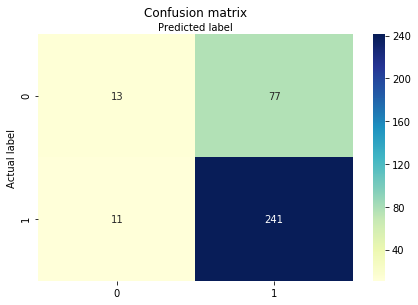

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

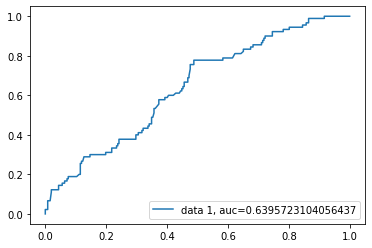

In [99]:
y_pred_proba = logReg2.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score for the case is 0.63. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.

In [100]:
print(logReg2.coef_)
print(logReg2.intercept_)

[[ 0.          0.          0.          0.          0.          0.39039065
   0.          0.         -0.32973426 -0.05593888  1.40385712  0.
   0.63694925  0.          0.          0.         -0.4317903  -1.73722291
   0.60964524  1.33329409  0.          0.          0.34575481  0.
   0.          0.47580221 -1.25153624 -0.12035668  0.10391241  0.
  -5.63414579  0.          0.          0.          0.        ]]
[-0.22679842]


In [101]:
## Probalility of getting 1 i.e churn
prob_test_1 = logReg2.predict_proba(X_test)[:,1]
#prob_test_1

In [102]:
x_train_frame.columns

Index(['auto_renewal_1', 'auto_renewal_2', 'auto_renewal_3', 'auto_renewal_4',
       'termination_rights_1', 'termination_rights_2', 'termination_rights_3',
       'legal_terms_1', 'legal_terms_3', 'legal_terms_4', 'legal_terms_5',
       'legal_terms_6', 'sla_1', 'sla_2', 'sla_3', 'sla_4',
       'sec_breach_note_1', 'sec_breach_note_2', 'sec_breach_note_3',
       'sec_breach_note_4', 'non_std_outrageous_0', 'non_std_outrageous_1',
       'package_1', 'package_2', 'package_3', 'package_4', 'package_5',
       'segment_0', 'segment_1', 'duration', 'renewal_ARR', 'N° of Licenses',
       'Used Licenses', 'assigned_user', 'employees_trans'],
      dtype='object')

In [103]:
prob_train_1 = logReg2.predict_proba(X_train)[:,1]
#prob_train_1

## Validation

In [104]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, x, y, cv=10)
cv_scores
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

Overall Accuracy: 0.71 (+/- 0.03)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


## Application

In [107]:
x_name = df_copy['Customer Name']
x_train_name, x_test_name = train_test_split(x_name, test_size=0.33, random_state=11)
#x_train_name

In [108]:
p_train_1 = pd.DataFrame(prob_train_1)
p_test_1 = pd.DataFrame(prob_test_1)
p_1 = np.array(pd.concat([p_test_1, p_train_1]).reset_index(drop=True))

p = np.array([p_1[i][0] for i in range (len(p_1))])

In [128]:
def compute_quantile(df):
    tmp = pd.DataFrame(df)
    tmp = np.array(tmp[0].sort_values())
    
    lv1_len = math.ceil(1/5 * len(tmp))
    lv2_len = math.ceil(2/5 * len(tmp))
    lv3_len = math.ceil(3/5 * len(tmp))
    lv4_len = math.ceil(4/5 * len(tmp))
    
    level1 = tmp[lv1_len]
    level2 = tmp[lv2_len]
    level3 = tmp[lv3_len]
    level4 = tmp[lv4_len]
    
    return level1, level2, level3, level4

In [139]:
p_level1, p_level2, p_level3, p_level4 = compute_quantile(p)
#print(p_level1, p_levl2, p_level3, p_level4)

- <b>Apply score back to train set</b>

In [140]:
def compute_score(df):
    p_bin = np.array(df)
    p_bin = [p_bin[i][0] for i in range (len(p_bin))]

    for i in range (len(p_bin)):
        if p_bin[i] <= p_level1:
            p_bin[i] = '1'
        elif p_level1 < p_bin[i] <= p_level2:
            p_bin[i] = '2'
        elif p_level2 < p_bin[i] <= p_level3:
            p_bin[i] = '3'
        elif p_level3 < p_bin[i] <= p_level4:
            p_bin[i] = '4'
        else:
            p_bin[i] = '5'
        
    return p_bin       

In [156]:
train_score = compute_score(p_train_1)

x_train_new = pd.DataFrame(x_train_name).reset_index(drop=True)
x_train_new['prob'] = p_train_1
x_train_new['score'] = train_score

- <b>Apply score back to test set</b>

In [158]:
test_score = compute_score(p_test_1)

x_test_new = pd.DataFrame(x_test_name).reset_index(drop=True)
x_test_new['prob'] = p_test_1
x_test_new['score'] = test_score

In [165]:
combined = pd.concat([x_train_new, x_test_new], ignore_index=True)
combined = combined.sort_values(by=['Customer Name']).reset_index(drop=True)

In [167]:
combined.to_csv('Customer_Health_Score.csv', index=False)